## California Dairy Production Prediction

### Author - Lih Jen Tobin¶

**Summary:
The California dairy production dataset, perform time series analysis on the data 
for Cottage Cheese Production and use SARIMA model to predict the next 24 months:


In [ ]:
# First import the data

In [19]:
from math import sin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"
CAD = pd.read_csv('https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv')
CAD.index = pd.date_range(start = '1-1-1995', end = '12-31-2013', freq = 'M')
print(CAD.head(5))
print(CAD.tail(5))

            Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  \
1995-01-31  1995   Jan              4.370         51.595      2.112   
1995-02-28  1995   Feb              3.695         56.086      1.932   
1995-03-31  1995   Mar              4.538         68.453      2.162   
1995-04-30  1995   Apr              4.280         65.722      2.130   
1995-05-31  1995   May              4.470         73.730      2.227   

            N.CA.Fat.Price  Month.Count  monthNumSqred  monthNumCubed  
1995-01-31          0.9803            1              1              1  
1995-02-28          0.8924            2              4              8  
1995-03-31          0.8924            3              9             27  
1995-04-30          0.8967            4             16             64  
1995-05-31          0.8967            5             25            125  
            Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  \
2013-08-31  2013   Aug              2.169         78.382      3.400   

In [ ]:
# Use only the cottage cheese data from the dataframe
# And take a look for the plot

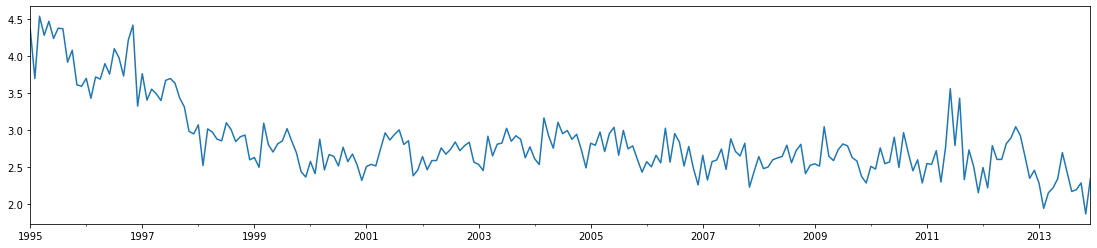

In [3]:
data=CAD['Cotagecheese.Prod']
data.index = pd.date_range(start = '1-1-1995', end = '12-31-2013', freq = 'M')
data.plot(figsize=(19, 4))
plt.show()

In [ ]:
# We can see the data has a downward treand along with seasonal change yearly

In [ ]:
# Let’s build the SARIMA model using pmdarima‘s auto_arima() to find the best orders for parameters
# we set seasonal=True, frequency m=12, and differencing to D=1

In [4]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-65.010, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=104.043, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10.256, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-64.322, Time=0.34 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=17.641, Time=0.06 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-26.915, Time=0.18 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=2.20 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-35.720, Time=0.29 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=-65.641, Time=0.61 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=18.516, Time=0.10 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=-63.997, Time=2.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-28.331, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  228
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  36.865
Date:                              Wed, 07 Oct 2020   AIC                            -65.730
Time:                                      11:33:27   BIC                            -52.248
Sample:                                           0   HQIC                           -60.283
                                              - 228                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7092      0.063    -11.323      0.000      -0.832      -0.586
ar.L2         -0.3810      0.063     -6.081      0.000      -0.504      -0.258
ma.S.L12      -0.8588      0.058    -14.763      0.000      -0.973      -0.745
sigma2         0.0385      0.003     15.310      0.000       0.034       0.043
===================================================================================
Ljung-Box (Q):                       53.34   Jarque-Bera (JB):               113.45
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.12
Prob(H) (two-sided):                  0.17   Kurtosis:                         6.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# The best model SARIMAX(2, 1, 0)x(0, 1, 1, 12) has an AIC of -65.730 and the P Values are significant.

In [ ]:
# Let's analyze the residual from the model ..

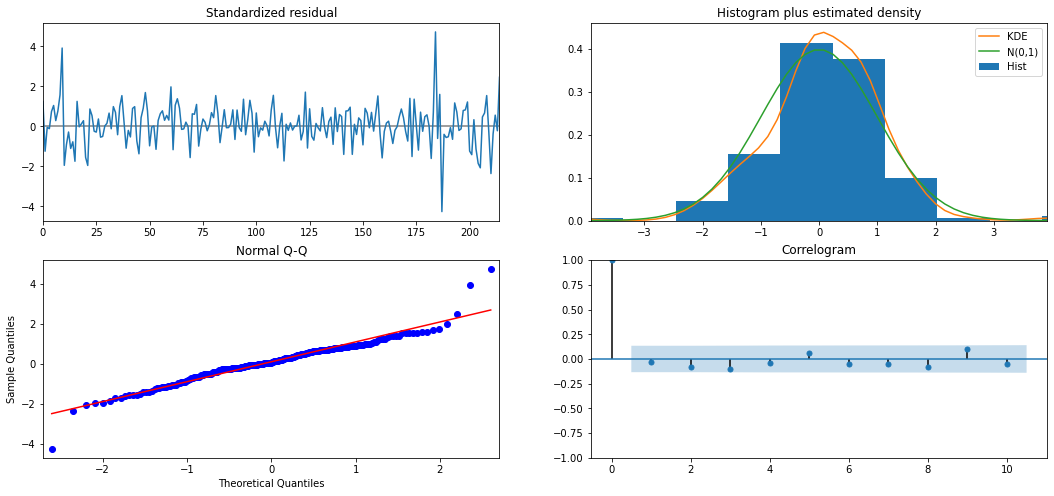

In [6]:
smodel.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
# from above...
# The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
# The density plot suggest normal distribution with mean zero.
# dots fall perfectly in line with the red line with some skewed distributions.
# ACF plot shows the residual errors are not autocorrelated.

In [ ]:
# Let’s forecast for the next 24 months.

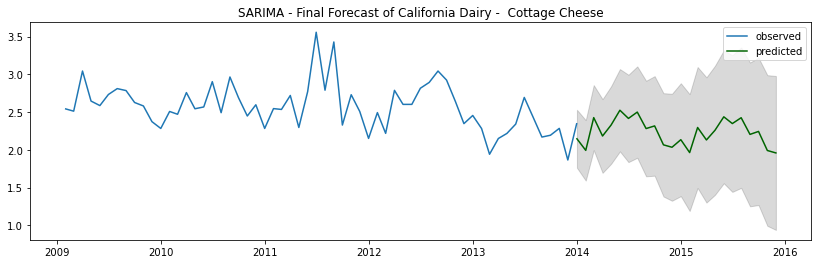

In [18]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(14,4)) 
plt.plot(data['2009':], label='observed')
plt.plot(fitted_series, color='darkgreen', label='predicted')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)


plt.title("SARIMA - Final Forecast of California Dairy -  Cottage Cheese")
plt.legend()
plt.show()

In [ ]:
# Now you can see the 24 months (2014 ~ 2016) cottage cheese demands